# Introducción
1. **Exploración y preprocesamiento de datos**
3. **Reducción de dimensionalidad (PCA)**: Implementaré PCA para reducir la cantidad de dimensiones y determinar cuántas son necesarias para preservar el 95% de la varianza.
4. **Análisis de agrupamiento**:
   - **Elbow Plot y Silhouette Score**: Determinar el número óptimo de clusters.
   - **Aplicación de KMeans**
5. **Uso de KMeans para reducción de dimensionalidad**

# Código

In [72]:
import pandas as pd

data = pd.read_csv("UML_2024.csv")
# Mostrar las primeras filas y un resumen de los datos

data.info() # No hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

Hay un valor faltante en la columna `Geometrical_shape_coefficient`. La imputación podría ser un enfoque razonable dado que solo falta un valor. Voy a imputar con la mediana de esa columna para preservar la distribución de los datos.

In [73]:
data.head()

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66


- **Molecular_weight, LogP, PolarSurfaceArea**: Son propiedades físico-químicas de las moléculas que incluyen el peso molecular, la lipofilicidad (LogP) y el área de superficie polar, respectivamente.
- **Number_of_HBA**, **Number_of_HBD**, **Number_of_acidic_groups**, etc.: Estas columnas representan diferentes grupos funcionales o características estructurales de las moléculas, como el número de aceptadores y donantes de enlaces de hidrógeno, grupos ácidos, entre otros.
- **Geometrical_diameter, Geometrical_radius, Geometrical_shape_coefficient**: Métricas que describen la geometría de la molécula.

In [74]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,300.0,3.601528e+07,4.067521e+07,1046.000000,5.281500e+06,1.388871e+07,6.880700e+07,1.560257e+08
Molecular_weight,300.0,3.348073e+02,1.429548e+02,122.115432,1.858750e+02,3.523860e+02,4.567110e+02,9.176300e+02
LogP,300.0,7.927830e+00,6.127177e+00,-1.765100,2.399200e+00,6.627100e+00,1.357108e+01,4.037570e+01
Number_of_HBA_1,300.0,3.013333e+01,1.827280e+01,7.000000,1.300000e+01,2.700000e+01,4.800000e+01,1.180000e+02
Number_of_HBA_2,300.0,4.460000e+00,1.224772e+00,2.000000,4.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
Number_of_HBD_1,300.0,1.433333e+00,8.648983e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Number_of_HBD_2,300.0,1.493333e+00,1.169551e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Number_of_acidic_groups,300.0,3.233333e-01,5.225250e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Number_of_aliphatic_OH_groups,300.0,5.533333e-01,9.255689e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
Number_of_basic_groups,300.0,4.333333e-02,2.858811e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


In [75]:
# import matplotlib.pyplot as plt
# for c in data.columns[1:]:
#     data.boxplot(c,by='Number_of_basic_groups',figsize=(7,4),fontsize=14)
#     plt.title("{}\n".format(c),fontsize=16)

In [76]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Imputar el valor faltante usando la mediana
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)

# Escalar los datos para PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Aplicar PCA
pca = PCA()
pca.fit(data_scaled)

# Calcular la varianza acumulada explicada para determinar cuántas componentes se necesitan para el 95% de la varianza
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Encontrar el número mínimo de componentes para alcanzar al menos el 95% de varianza explicada
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
cumulative_variance, n_components_95

(array([0.39297411, 0.48979047, 0.57384367, 0.6504438 , 0.69792061,
        0.74141678, 0.77290343, 0.80342392, 0.83336388, 0.86182374,
        0.88857868, 0.91330457, 0.93183334, 0.947709  , 0.96061275,
        0.97119544, 0.98113489, 0.98763861, 0.99148932, 0.99400256,
        0.99602485, 0.99756277, 0.99882182, 0.99941053, 0.99965046,
        0.99981468, 0.99989434, 0.99995457, 0.99998113, 0.9999975 ,
        0.99999938, 0.9999998 , 0.99999999, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 15)

Después de aplicar PCA y escalar los datos, hemos encontrado que **se necesitan 15 componentes principales para preservar al menos el 95% de la varianza total** en los datos. Esto significa que podemos reducir la dimensionalidad de los datos de 39 a 15 componentes sin perder mucha información.

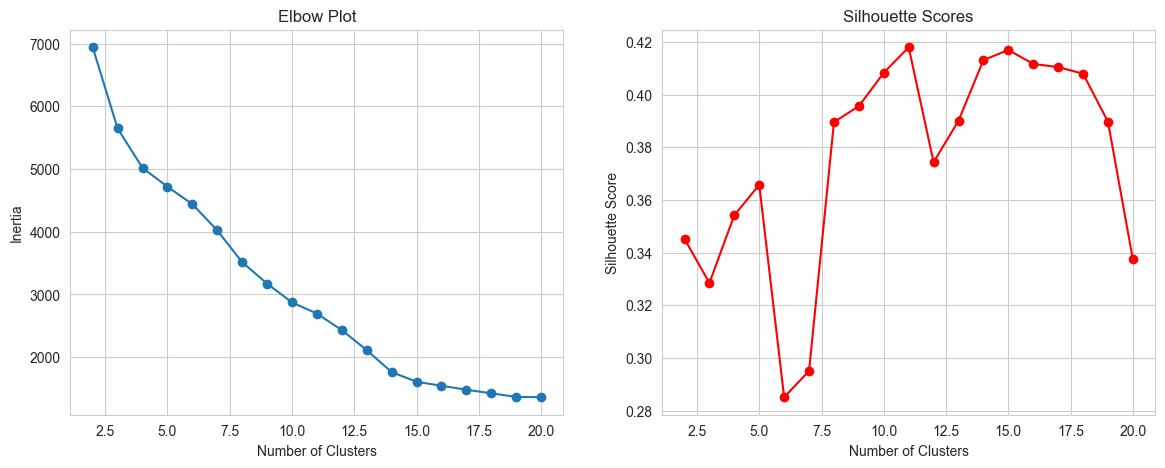

In [77]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Reducir la dimensionalidad a 15 componentes
pca_15 = PCA(n_components=15)
data_pca_15 = pca_15.fit_transform(data_scaled)

# Rango de número de clusters a evaluar
range_clusters = range(2, 21)

# Calcular la suma de cuadrados interna (inertia) y el silhouette score para cada número de clusters
inertias = []
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=48)
    kmeans.fit(data_pca_15)
    inertias.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_pca_15, labels))

# Crear gráficos para el Elbow Plot y Silhouette Scores
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Plot
ax[0].plot(range_clusters, inertias, marker='o')
ax[0].set_title('Elbow Plot')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')

# Silhouette Score Plot
ax[1].plot(range_clusters, silhouette_scores, marker='o', color='r')
ax[1].set_title('Silhouette Scores')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')

plt.show()

1. **Elbow Plot**: Observamos que la curva tiene un punto de inflexión alrededor de 15 clusters. Este punto se puede considerar como el "codo" donde la disminución de la inercia se estabiliza, indicando que añadir más clusters no mejora significativamente la compactación de los mismos.

2. **Silhouette Score**: El valor del silhouette score varía con el número de clusters. Vemos que el score es relativamente alto para 11 clusters, pero luego se observan valores también interesantes alrededor de 15 clusters. El silhouette score mide qué tan bien están definidos los clusters (cercanía entre puntos del mismo cluster y lejanía con puntos de otros clusters).

Basándonos en estos resultados, parece razonable elegir 15 clusters para el agrupamiento, ya que este número aparece como un buen equilibrio en ambos análisis.

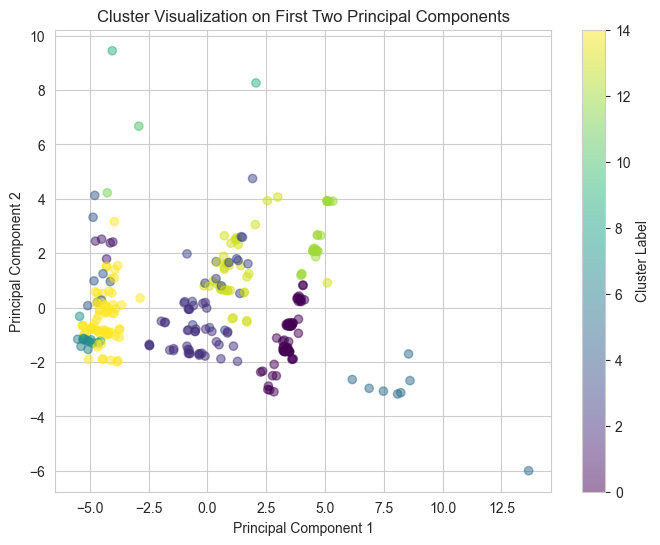

,cid,Cluster_Labels
0,1046,14
1,124704,1
2,171646,8
3,171647,14
4,181450,14
5,258796,14
6,280449,14
7,284752,14
8,301266,14
9,470898,14


In [78]:
# Aplicar KMeans con 15 clusters
kmeans_final = KMeans(n_clusters=15, random_state=42)
kmeans_final.fit(data_pca_15)
labels_final = kmeans_final.labels_

# Agregar las etiquetas de cluster al dataframe original para una fácil interpretación
data['Cluster_Labels'] = labels_final

# Visualización de las asignaciones de cluster para las dos primeras componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_15[:, 0], data_pca_15[:, 1], c=labels_final, cmap='viridis', alpha=0.5)
plt.title('Cluster Visualization on First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Devolver algunos datos etiquetados para ver cómo se han agrupado
data[['cid', 'Cluster_Labels']].head(10)

# Preguntas

**- ¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?** \
    Se necesitan 15 componentes principales para preservar al menos el 95% de la varianza total.

**- ¿Cómo usarías KMeans para reducir la dimensionalidad?** \
    Después de aplicar KMeans, se pueden utilizar las etiquetas de cluster como una forma de transformación de características, donde cada etiqueta representa una región del espacio de características original.